# Lab 2 - Group 17
###  Ranjith Kumar Peram, Sachin Jignesh Patel, Justin DeKock

## Questions: 
1. Number of files submitted for the month of March

2. Maximum duration for each year 

3. Number of songs released for each artist for all years.

4. Number of songs released for each artist in 2010.

5. Number of songs released for each top genre in each year released. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Spotify data_5748010.csv')
df['added'] = pd.to_datetime(df['added'], format='%Y/%m/%d')

(1000, 17)

In [66]:
print(f'{df.shape[0]} rows over {df.shape[1]} columns')
print(df.columns)

1000 rows over 17 columns
Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')


## 1. Number of files submitted for the month of March

In [18]:
def count_march_submissions():
    added_in_march = df[df['added'].dt.month == 3]
    print(f'{len(added_in_march)} files have been submitted in the month of March.')
    
march_subs = count_march_submissions()

3 files have been submitted in the month of March.


## 2. Maximum duration for each year 

In [86]:
def get_max_dur_yearly():
    max_dur_df = (df.groupby(['year released'])['dur']
                  .max().sort_values(ascending=False)
                  .reset_index())
    return max_dur_df
    
max_dur_df = get_max_dur_yearly()
print('Maximum duration of songs by year:')
display(max_dur_df)

Maximum duration of songs by year:


,year released,dur
0,2013,688
1,2018,418
2,1975,354
3,2012,350
4,2016,348
5,2017,343
6,2011,337
7,2014,323
8,2009,321
9,2010,308


In [89]:
def get_max_dur_detail():
    max_dur_detail_df = (df.loc[df.groupby('year released')['dur'].idxmax(), 
                       ['year released', 'dur', 'artist', 'title']]
                        .reset_index(drop=True))
    return max_dur_detail_df

max_dur_detail_df = get_max_dur_detail()
display(max_dur_detail_df)

,year released,dur,artist,title
0,1975,354,Queen,Bohemian Rhapsody - Remastered 2011
1,2009,321,Sidney Samson,Riverside
2,2010,308,Black Eyed Peas,The Time (Dirty Bit)
3,2011,337,Bon Iver,Holocene
4,2012,350,Kendrick Lamar,m.A.A.d city
5,2013,688,Justin Timberlake,Not a Bad Thing
6,2014,323,Beyoncé,Drunk in Love (feat. Jay-Z)
7,2015,296,Adele,Hello
8,2016,348,The 1975,Somebody Else
9,2017,343,Migos,Bad and Boujee (feat. Lil Uzi Vert)


## 3. Number of songs released for each artist for all years.

In [22]:
def total_songs_by_artist():
    count_df = (df.groupby('artist')['title']
                .count().sort_values(ascending=False).reset_index()
                .rename(columns={'title': 'songs_released'}))
    return count_df

total_counts_artist = total_songs_by_artist()
print('Total number of songs released by artist for all years:')
total_counts_artist.head()

Total number of songs released by artist for all years:


,artist,songs_released
0,Taylor Swift,21
1,Drake,18
2,Calvin Harris,18
3,Rihanna,14
4,Ariana Grande,14


## 4. Number of songs released for each artist in 2010.

In [28]:
def songs_by_artist_2010():
    df_2010 = df[df['year released'] == 2010]
    count_2010 = (df_2010.groupby('artist')['title'].count()
                  .sort_values(ascending=False).reset_index()
                  .rename(columns={'title': 'count'}))
    return count_2010
    
counts_2010 = songs_by_artist_2010()
print('Total number of songs relesed by artist in 2010')
counts_2010.head()

Total number of songs relesed by artist in 2010


,artist,count
0,Kesha,6
1,Bruno Mars,5
2,Rihanna,5
3,Usher,4
4,Jason Derulo,3


## 5. Number of songs released for each top genre in each year released. 

In [36]:
def genre_counts_yearly():
    yearly_genre_counts = (df.groupby(['top genre', 'year released'])['title'].count()
                          .sort_values(ascending=False).reset_index()
                          .rename(columns={'title': 'count'}))
    return yearly_genre_counts

yearly_genre_counts = genre_counts_yearly()
print('Total number of songs released each year by genre:')
yearly_genre_counts.head()

Total number of songs released each year by genre:


,top genre,year released,count
0,dance pop,2012,50
1,dance pop,2016,42
2,dance pop,2010,42
3,dance pop,2014,39
4,dance pop,2011,34


In [90]:
def total_genre_count():
    count_by_genre = (df.groupby('top genre')['title'].count()
                      .sort_values(ascending=False).reset_index()
                      .rename(columns={'title': 'count'}))
    return count_by_genre

total_genre_counts = total_genre_count()
print('Total number of songs released by genre over all years:')
total_genre_counts.head()

Total number of songs released by genre over all years:


,top genre,count
0,dance pop,361
1,pop,57
2,atl hip hop,39
3,art pop,37
4,hip hop,21


## Plot diagram showing the number of songs added by month & year

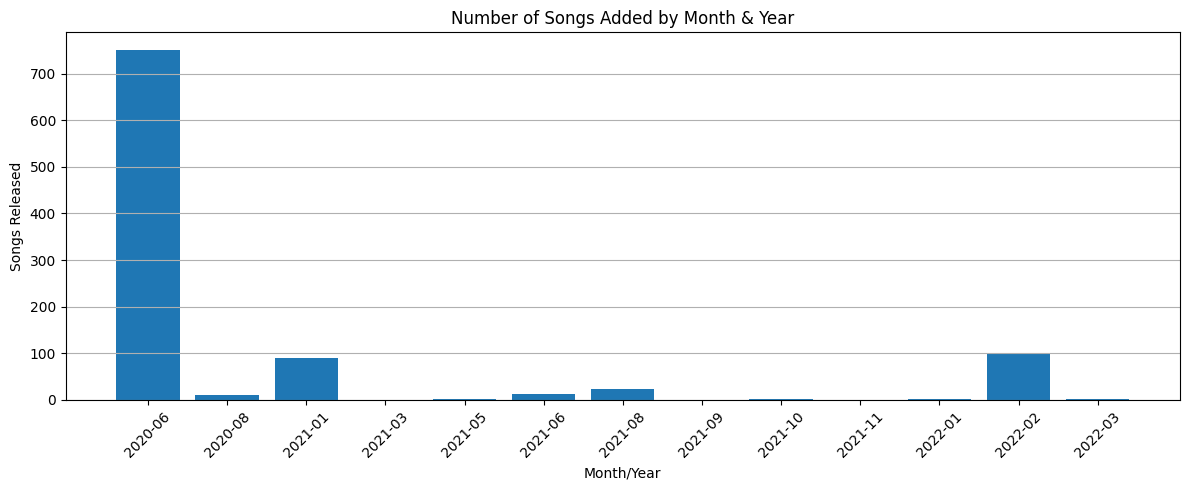

In [49]:
def plot_entries(ax, title):
    df['year_month'] = df['added'].dt.to_period('M')
    monthly_counts = df.groupby('year_month')['title'].count()
    
    ax.bar(monthly_counts.index.astype(str), monthly_counts.values)
    ax.set_title(title)
    ax.set_xlabel('Month/Year')
    ax.set_ylabel('Songs Released')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y')

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plot_entries(ax=ax, title='Number of Songs Added by Month & Year')
plt.tight_layout()
plt.show()

## Line graph diagram showing the number of songs added by top genre for all years

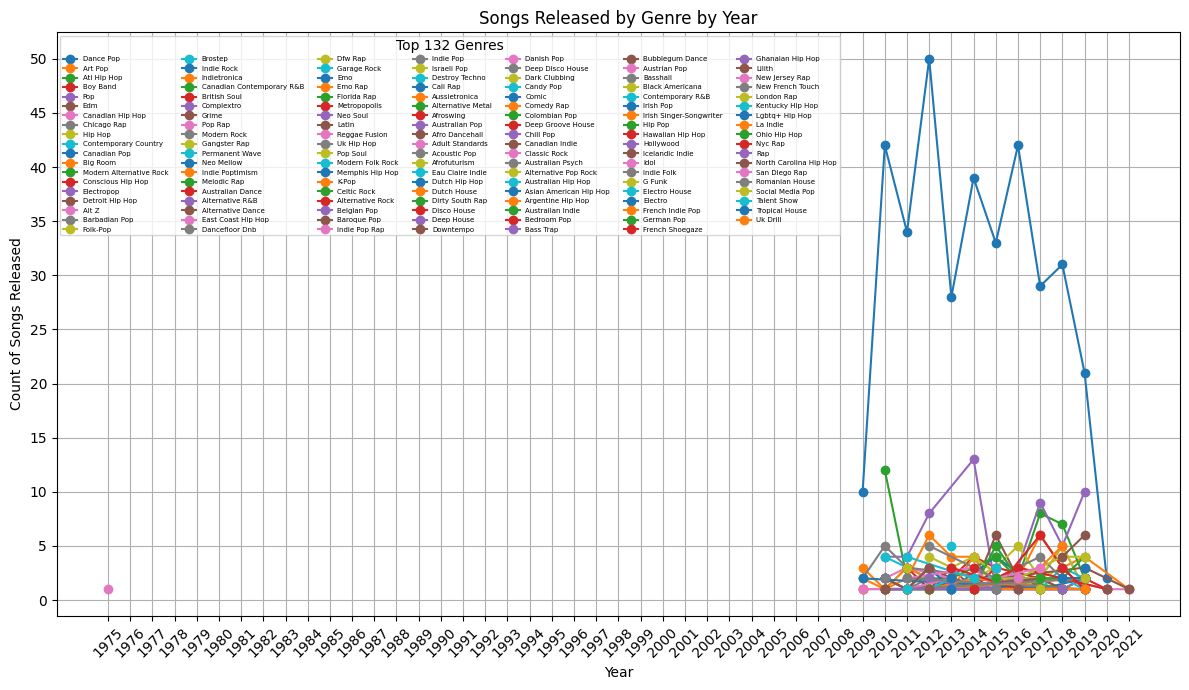

In [ ]:
def plot_all_counts(ax, title):
    plot_df_raw = df.groupby(['top genre', 'year released']).size().reset_index(name='count')
    
    min_year = plot_df_raw['year released'].min()
    max_year = plot_df_raw['year released'].max()
    max_cnt = (plot_df_raw['count'].max() // 5 + 1) * 5


    top_genres = plot_df_raw['top genre'].value_counts().index
    
    for genre in top_genres:
        genre_data = plot_df_raw[plot_df_raw['top genre'] == genre] 
        ax.plot(genre_data['year released'], genre_data['count'], label=str(genre).title(), marker='o') 
                                                            # use .title() to capitalize legend labels
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count of Songs Released')
    ax.set_xticks(range(min_year, max_year+1))
    ax.set_yticks(range(0, max_cnt, 5))
    ax.tick_params(axis='x', rotation=45)
    
    ax.legend(title=f'Top {len(top_genres)} Genres',
               ncols=7, 
               fontsize=5, 
               loc='upper left')
    ax.grid(True)
    
# plot all years and all genres
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
plot_all_counts(ax=ax, title='Songs Released by Genre by Year')
plt.tight_layout()
plt.show()

#### There's a single entry from 1975 that is skewing the data - the next plot function will exclude this entry and only plot the data beginning in 2009.

In [97]:
print((87 // 5+1)*5) 

90


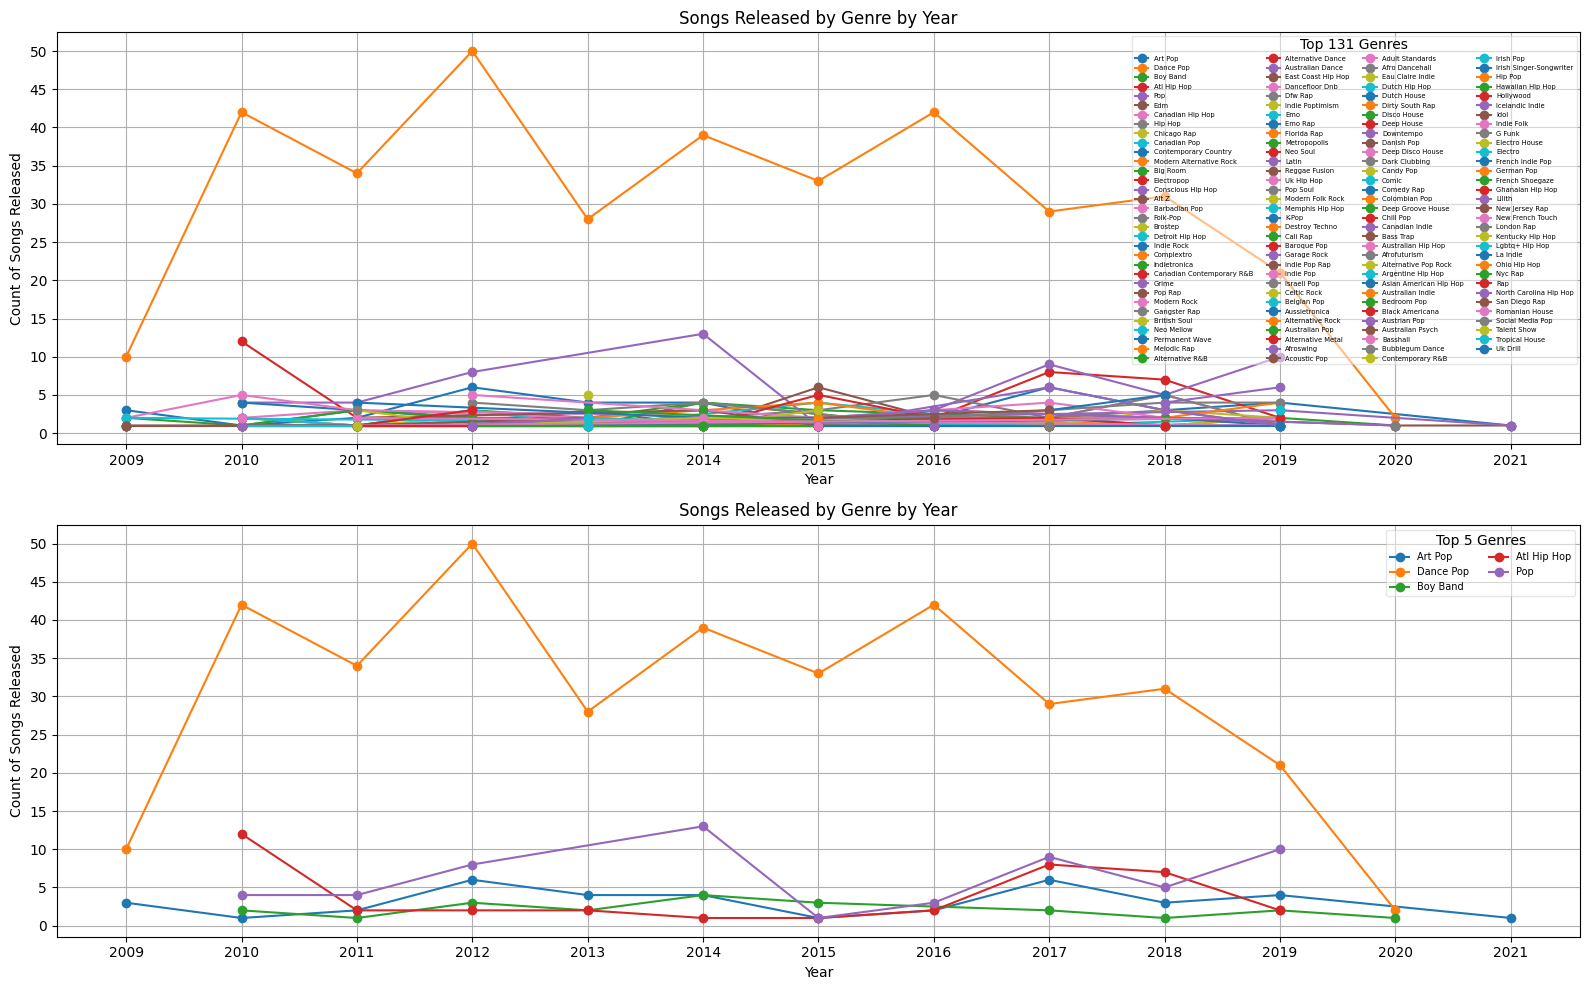

In [54]:
def plot_odd_year_excluded(ax, title, num_genres=None):
    df_excl_1975 = (df[df['year released'] > 1975]
                    .groupby(['top genre', 'year released'])
                    .size().reset_index(name='count'))
    
    min_year = df_excl_1975['year released'].min()
    max_year = df_excl_1975['year released'].max()
    max_cnt = (df_excl_1975['count'].max() // 5 + 1) * 5 # next multiple of 5 > highest count

    if num_genres: # get the genres with highest counts based off num passed to function
        top_genres = df_excl_1975['top genre'].value_counts().nlargest(num_genres).index 
    else:
        top_genres = df_excl_1975['top genre'].value_counts().index
    
    for genre in top_genres:
        genre_data = df_excl_1975[df_excl_1975['top genre'] == genre]
        ax.plot(genre_data['year released'], genre_data['count'], label=str(genre).title(), marker='o')

    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count of Songs Released')
    ax.set_xticks(range(min_year, max_year+1))
    ax.set_yticks(range(0, max_cnt, 5))
    
    ax.legend(title=f'Top {num_genres if num_genres else len(top_genres)} Genres',
               ncols=2 if num_genres else 4, # display the legend differently if no num_genres is specified
               fontsize=7 if num_genres else 4.85, # to accomodate for the 131 genres
               framealpha=0.5, loc='upper right')
    ax.grid(True)
    
# plot all top genres and limited to 20 genres
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))
plot_odd_year_excluded(ax=ax1, title='Songs Released by Genre by Year')
plot_odd_year_excluded(ax=ax2, title='Songs Released by Genre by Year', num_genres=5)
plt.tight_layout()
plt.show()

##### It looks much better without the single entry from 1975. 
##### There are 131 distinct genres represented in this dataset. Many of these genres seem to be subgenres of the more commonly known pop, hip hop, rock, etc
##### The following function will categorize/bin these 131 genres into 10 more general genres

In [ ]:
years_norm_df = df[df['year released'] > 1975].copy()

# create dictionary to assign a normalized/binned genre to each of the top genres
genres_dict = {
    'pop': ['pop', 'boy band', 'singer-songwriter', 'talent show', 'idol', 'latin'],
    'hiphop-rap': ['hip hop', 'rap', 'drill', 'afroswing', 'basshall', 'g funk'],
    'rock': ['rock', 'emo', 'shoegaze', 'alt z', 'permanent wave', 'psych'],
    'alt-indie': ['indie', 'downtempo', 'lilith', 'reggae fusion'],
    'r&b-soul': ['soul', 'r&b', 'neo mellow'],
    'metal': ['metal'],
    'country': ['country', 'black americana'], 
    'jazz': ['adult standards'],
    'soundtrack': ['comic', 'hollywood'],
    'electronic': ['edm', 'house', 'techno', 'elect', 'tronica', 'club', 'dance',
                   'step','ex', 'french touch', 'room', 'futurism', 'grime']
}   

# returns the correct normalized genre based off top_genre for an individual row
def normalize_genres(top_genre): # to run -> df['top genre'].apply(normalize_genres)
    for norm_genre, og_genres in genres_dict.items():
        if any(og_genre in top_genre.lower() for og_genre in og_genres):
            return norm_genre
    return top_genre

# create new column genre and apply normalization function to each row to bin the genres
years_norm_df.loc[:, 'genre'] = years_norm_df['top genre'].apply(normalize_genres)

# get counts by year for each normalized genre
norm_df = (years_norm_df.groupby(['genre', 'year released'])['title']
               .count().reset_index()
               .rename(columns={'title': 'count'}))

##### Now the counts for the binned genres can be plotted

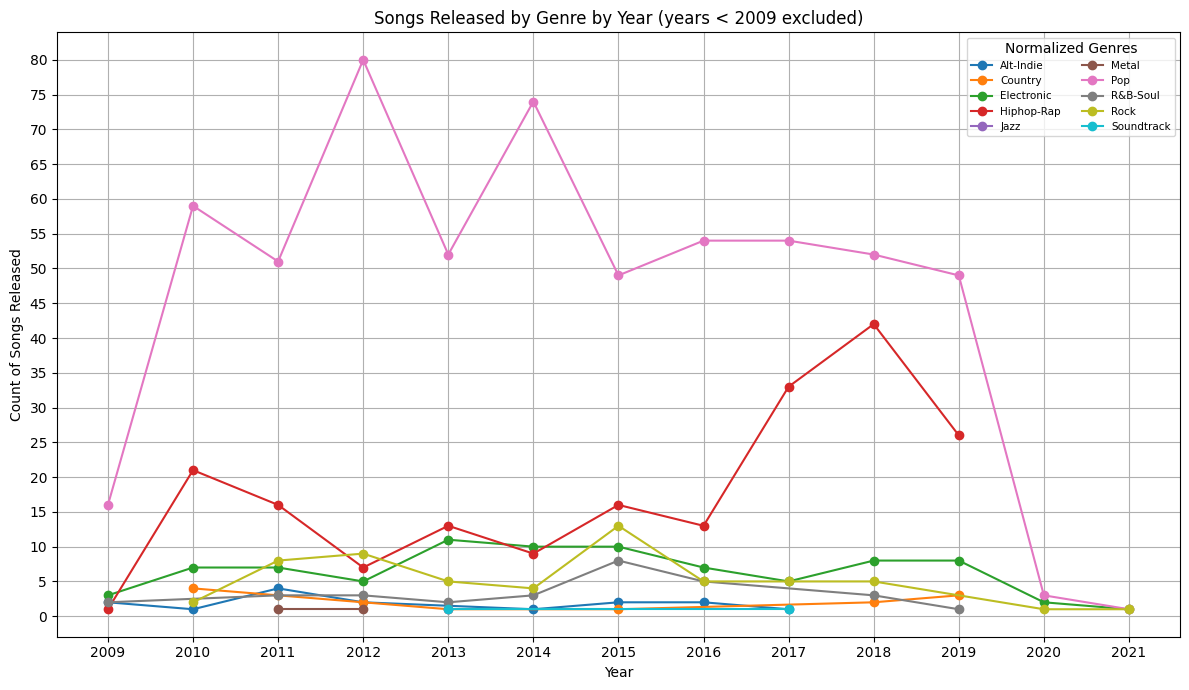

In [ ]:
def plot_normalized_data(ax, title):
        min_year = norm_df['year released'].min()
        max_year = norm_df['year released'].max() + 1
        max_cnt = (norm_df['count'].max() // 5 + 1) * 5 # next multiple of 5 > highest count
        
        for genre in norm_df['genre'].unique():
                plt_df = norm_df[norm_df['genre'] == genre]
                ax.plot(plt_df['year released'], plt_df['count'], label=str(genre).title(), marker='o')

        ax.set_title(title)
        ax.set_xlabel('Year')
        ax.set_ylabel('Count of Songs Released')
        ax.set_xticks(range(min_year, max_year))
        ax.set_yticks(range(0, max_cnt, 5))
        ax.legend(title='Normalized Genres', ncols=2, fontsize=7.5)
        ax.grid(True)
        
# plot normalized
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
plot_normalized_data(ax, 'Songs Released by Genre by Year (years < 2009 excluded)')
plt.tight_layout()
plt.show()

#### The subplots below show how how different levels of normalization/cleaning affect the visualization

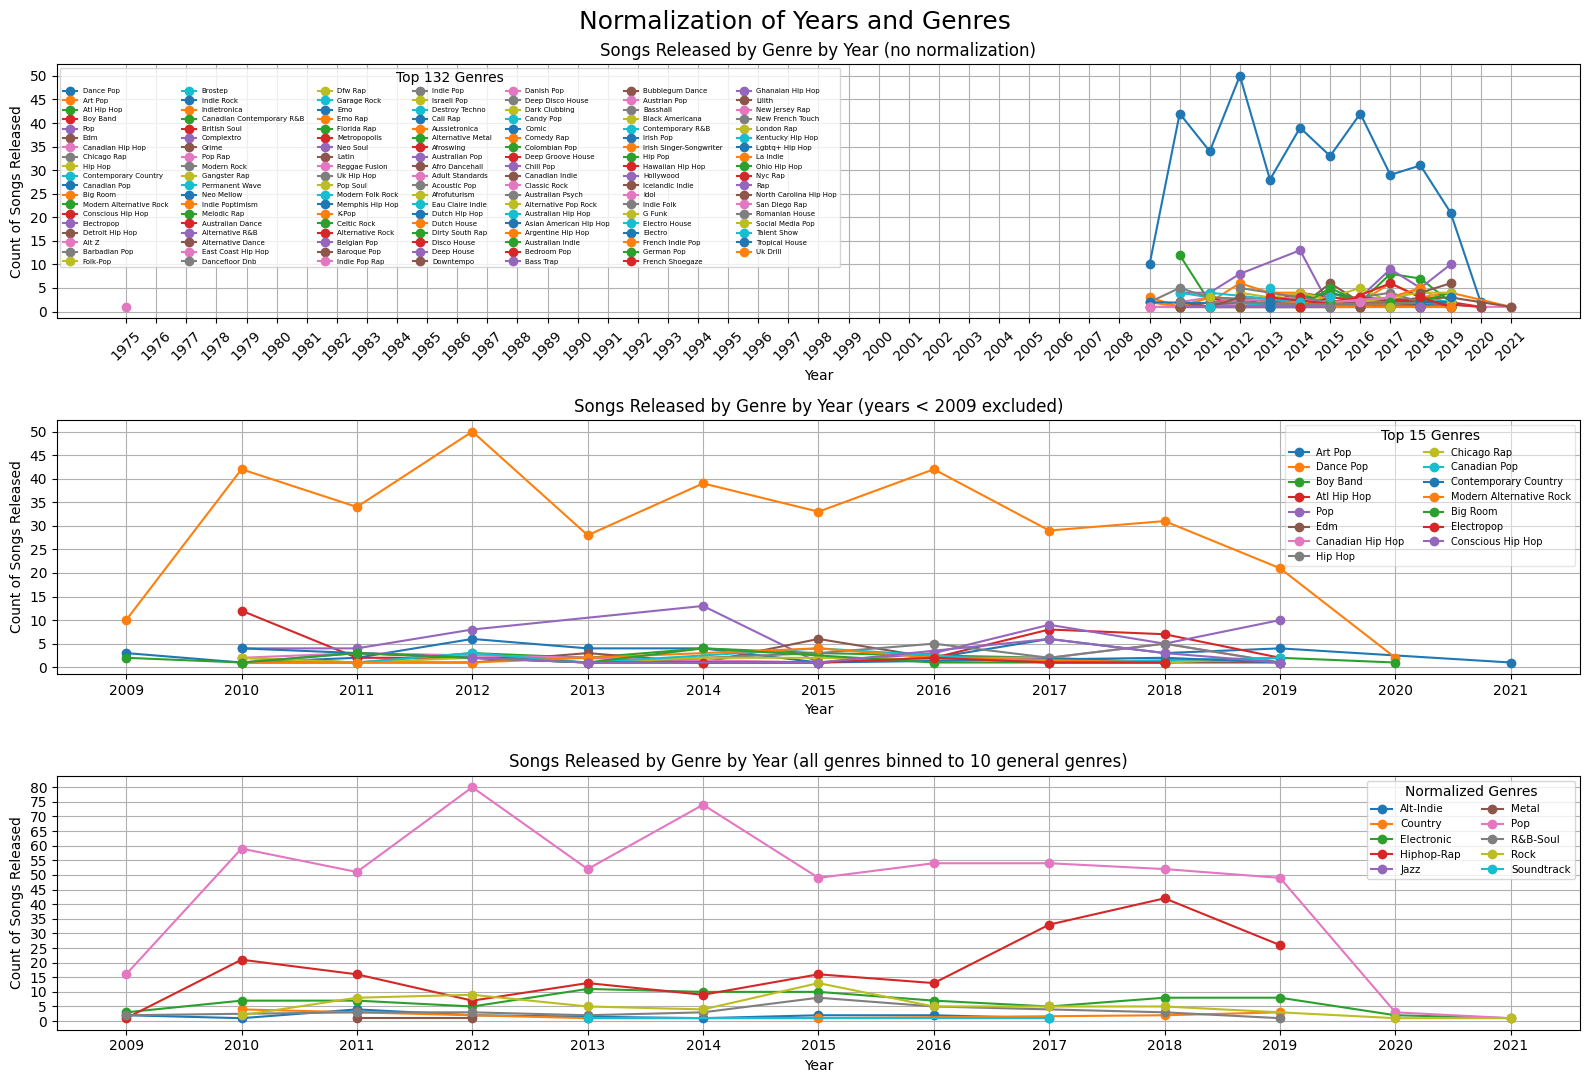

In [55]:
# plot unnormalzied, year normalized, and genre normalized 
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 11))
fig.suptitle('Normalization of Years and Genres', fontsize=18)

plot_all_counts(ax=ax1, title='Songs Released by Genre by Year (no normalization)')
plot_odd_year_excluded(ax=ax2, title='Songs Released by Genre by Year (years < 2009 excluded)', num_genres=15)
plot_normalized_data(ax=ax3, title='Songs Released by Genre by Year (all genres binned to 10 general genres)')

plt.tight_layout()
plt.show()

#### Lastly, below are two bar plots: the first shows the number of the top genres that were binned into that genre. The second shows the total number of songs released over all years per binned genre

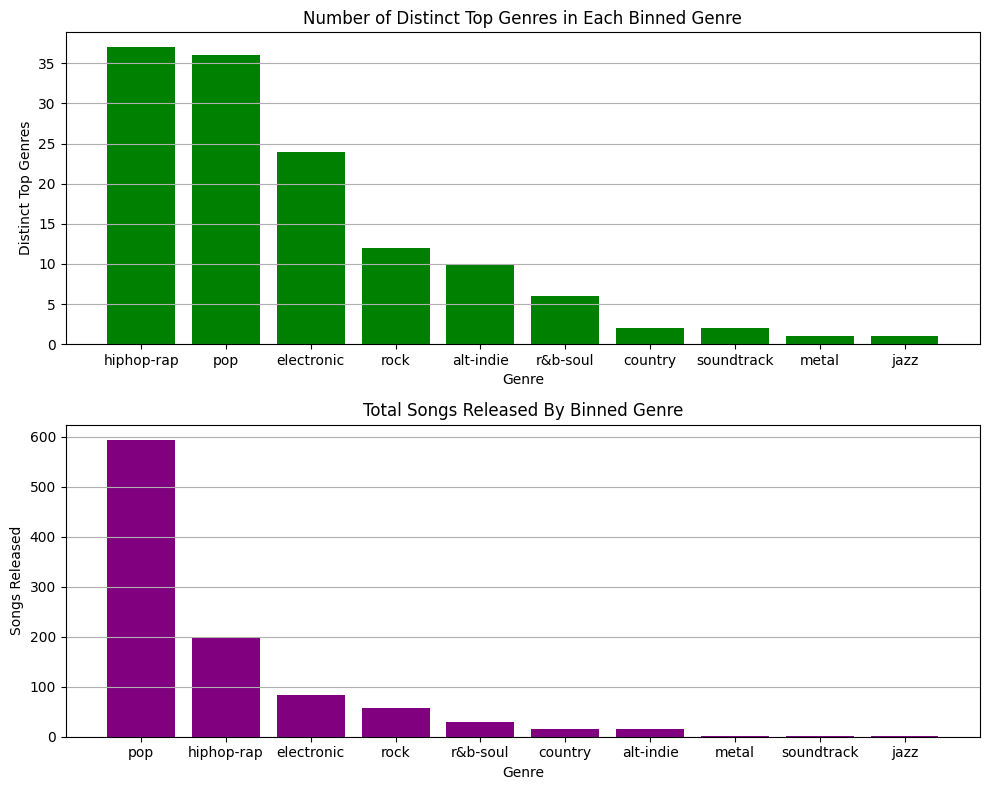

In [ ]:
# number of top genres in each binned genre
def plot_genre_count(ax, title):
    subgenre_counts = (years_norm_df.groupby(['genre'])['top genre']
                       .nunique().sort_values(ascending=False))
    ax.bar(subgenre_counts.index, subgenre_counts.values, color='green')
    ax.set_title(title)
    ax.set_xlabel('Genre')
    ax.set_ylabel('Distinct Top Genres')
    ax.grid(axis='y')

# total songs released by binned genre over all (normalized) years
def plot_genre_total_songs(ax, title):
    genre_counts = years_norm_df['genre'].value_counts()
    ax.bar(genre_counts.index, genre_counts.values, color='purple')
    ax.set_title(title)
    ax.set_xlabel('Genre')
    ax.set_ylabel('Songs Released')
    ax.grid(axis='y')
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_genre_count(ax1, 'Number of Distinct Top Genres in Each Binned Genre')
plot_genre_total_songs(ax2, 'Total Songs Released By Binned Genre')
plt.tight_layout()
plt.show()  